# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations

* After analyzing city weather data it is apperent that temperature and latitude are correlated. 
   * The further the distance from the equator in either direction (Northern or Southern), temerature decreases. 
* Humidity remained fairly consistent, and did not show much change when compared to the latitude. 
* The Northern Hemisphere also apears to have a higher concentartion of wind speeds than the Southern. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_list = []
lat_list= []
lng_list = []
max_temp_list = []
humidity_list = []
cloudy_list = []
wind_speed_list = []
country_list = []
date_list = []
index = 0
counter = 1

In [4]:
print("-------------------------") 
print("Beginning Data Retrieval ")
print("-------------------------") 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f'{url}appid={weather_api_key}&units={units}&q='

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(weather_url + city).json()
        city_list.append(response["name"])
        cloudy_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index > 49:
            index = 0
            counter = counter + 1
        else:
            index = index + 1
            
        print(f"Processing Record {index} of Set {counter} : {city}")
   
    except(KeyError, IndexError):
        print("City not found. Skipping.")
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

-------------------------
Beginning Data Retrieval 
-------------------------
Processing Record 2 of Set 1 : pandan niog
Processing Record 3 of Set 1 : chuy
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : puerto ayora
Processing Record 6 of Set 1 : ancud
Processing Record 7 of Set 1 : khatanga
City not found. Skipping.
Processing Record 9 of Set 1 : porto novo
Processing Record 10 of Set 1 : silopi
Processing Record 11 of Set 1 : thompson
City not found. Skipping.
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : guerrero negro
Processing Record 15 of Set 1 : naze
Processing Record 16 of Set 1 : fortuna
Processing Record 17 of Set 1 : provideniya
Processing Record 18 of Set 1 : luderitz
Processing Record 19 of Set 1 : moose factory
Processing Record 20 of Set 1 : albany
Processing Record 21 of Set 1 : talnakh
Processing Record 22 of Set 1 : nanortalik
Processing Record 23 of Set 1 : stjordalshalsen
Processing Record 24 of Set 1 : hermanu

Processing Record 0 of Set 137 : mamburao
Processing Record 0 of Set 138 : lagoa
Processing Record 0 of Set 139 : shahreza
Processing Record 0 of Set 140 : muros
Processing Record 0 of Set 141 : northam
Processing Record 0 of Set 142 : sur
Processing Record 0 of Set 143 : tasiilaq
Processing Record 0 of Set 144 : sekoma
Processing Record 0 of Set 145 : yar-sale
Processing Record 0 of Set 146 : thermi
Processing Record 0 of Set 147 : mackay
Processing Record 0 of Set 148 : guasdualito
City not found. Skipping.
Processing Record 0 of Set 149 : porto empedocle
Processing Record 0 of Set 150 : souillac
Processing Record 0 of Set 151 : porto franco
Processing Record 0 of Set 152 : rio grande
Processing Record 0 of Set 153 : kenai
Processing Record 0 of Set 154 : itaituba
Processing Record 0 of Set 155 : faya
Processing Record 0 of Set 156 : baykit
Processing Record 0 of Set 157 : kyaikkami
Processing Record 0 of Set 158 : qena
Processing Record 0 of Set 159 : victoria
Processing Record 0 of

Processing Record 0 of Set 323 : berlevag
Processing Record 0 of Set 324 : malakal
Processing Record 0 of Set 325 : senai
Processing Record 0 of Set 326 : kieta
Processing Record 0 of Set 327 : bridgewater
Processing Record 0 of Set 328 : bayan
Processing Record 0 of Set 329 : wattegama
Processing Record 0 of Set 330 : lethbridge
Processing Record 0 of Set 331 : upington
Processing Record 0 of Set 332 : hay river
Processing Record 0 of Set 333 : pinhao
Processing Record 0 of Set 334 : zagyvaszanto
Processing Record 0 of Set 335 : qala
Processing Record 0 of Set 336 : high prairie
Processing Record 0 of Set 337 : nanchang
Processing Record 0 of Set 338 : butte
City not found. Skipping.
Processing Record 0 of Set 339 : nantucket
Processing Record 0 of Set 340 : shimoda
Processing Record 0 of Set 341 : pombas
Processing Record 0 of Set 342 : mirandola
Processing Record 0 of Set 343 : ribeira grande
Processing Record 0 of Set 344 : kazanskoye
Processing Record 0 of Set 345 : sioux lookout


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame({"City": city_list,
                            "Lat": lat_list,
                            "Lng": lng_list,
                            "Max Temp": max_temp_list,
                            "Humidity": humidity_list,
                            "Wind Speed": wind_speed_list,
                            "Cloudiness":cloudy_list,
                            "Country": country_list,
                            "Date": date_list
                            })
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Pandan Niog,6.2282,120.5631,83.14,70,4.07,17,PH,1619741475
1,Chui,-33.6971,-53.4616,56.86,77,3.09,0,UY,1619741475
2,Punta Arenas,-53.1500,-70.9167,41.00,93,8.05,90,CL,1619741476
3,Puerto Ayora,-0.7393,-90.3518,76.62,80,9.04,46,EC,1619741476
4,Ancud,-41.8697,-73.8203,57.99,88,16.11,75,CL,1619741476


In [6]:
weather_data.to_csv('../output_data/weather_data.csv')
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Pandan Niog,6.2282,120.5631,83.14,70,4.07,17,PH,1619741475
1,Chui,-33.6971,-53.4616,56.86,77,3.09,0,UY,1619741475
2,Punta Arenas,-53.1500,-70.9167,41.00,93,8.05,90,CL,1619741476
3,Puerto Ayora,-0.7393,-90.3518,76.62,80,9.04,46,EC,1619741476
4,Ancud,-41.8697,-73.8203,57.99,88,16.11,75,CL,1619741476


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data['Humidity'].max()

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

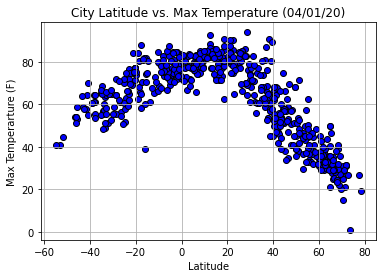

In [35]:
x = weather_data["Lat"]
y = weather_data["Max Temp"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")
plt.grid(True) 
plt.savefig('Max_Temp_Lat.png')

plt.show()

## Latitude vs. Humidity Plot

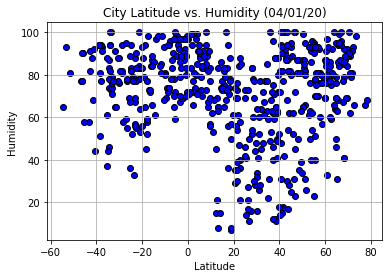

In [36]:
x = weather_data["Lat"]
y = weather_data["Humidity"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True) 
plt.savefig('Humid_Lat.png')

plt.show()

## Latitude vs. Cloudiness Plot

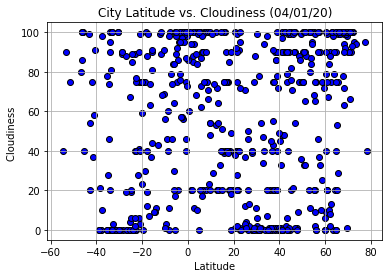

In [37]:
x = weather_data["Lat"]
y = weather_data["Cloudiness"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
plt.grid(True) 
plt.savefig('Cloud_Lat.png')

plt.show()

## Latitude vs. Wind Speed Plot

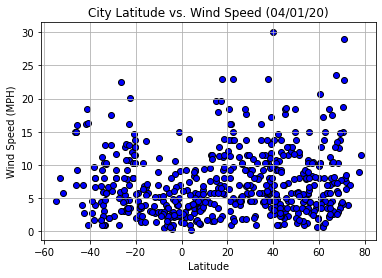

In [38]:
x = weather_data["Lat"]
y = weather_data["Wind Speed"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.savefig('Wind_Lat.png')

plt.show()

## Linear Regression

In [13]:
north_hem = weather_data.loc[weather_data["Lat"] >= 0.0]
north_hem.reset_index(inplace=True)

south_hem = weather_data.loc[weather_data["Lat"] < 0.0]
south_hem.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.7950367705838283


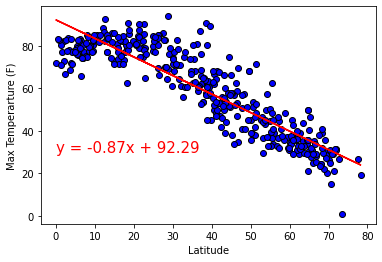

In [39]:
x = north_hem["Lat"]
y = north_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")
plt.savefig('North_Max_temp')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.5464396348962951


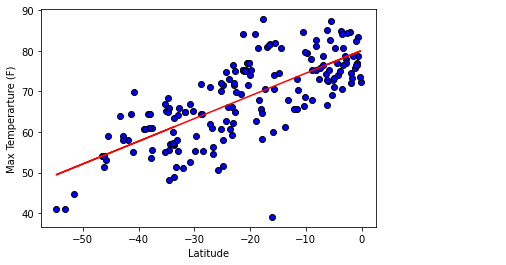

In [40]:
x = south_hem["Lat"]
y = south_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")
plt.savefig('South_Max_temp')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.012840665179352282


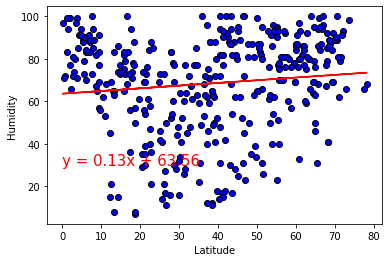

In [41]:
x = north_hem["Lat"]
y = north_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('North_Humid')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.03748095245233642


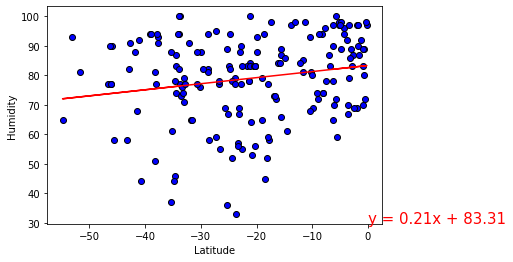

In [42]:
x = south_hem["Lat"]
y = south_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('South_Humid')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.020951794719098284


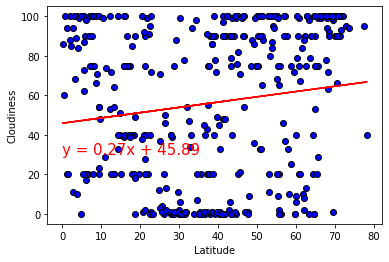

In [43]:
x = north_hem["Lat"]
y = north_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('North_Cloud')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.5464396348962951


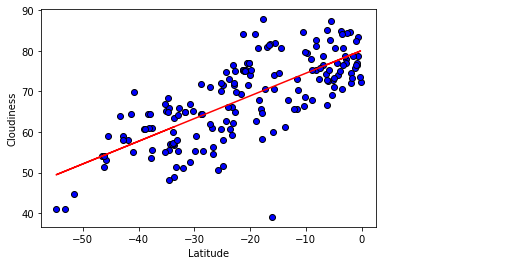

In [44]:
x = south_hem["Lat"]
y = south_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('South_Cloud')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.0131320876219651


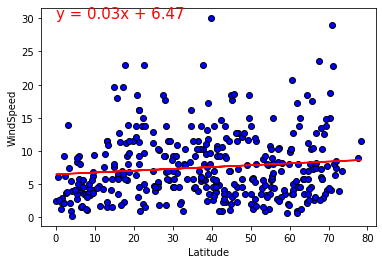

In [45]:
x = north_hem["Lat"]
y = north_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.savefig('North_Wind')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.10638775148663028


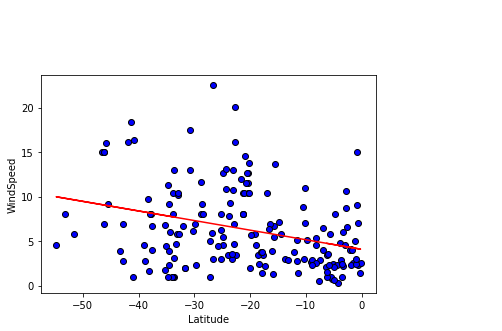

In [46]:
x = south_hem["Lat"]
y = south_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.savefig('South_Wind')

plt.show()